# A Machine Learning Modelling Tutorial with Python and Scikit-Learn

> The full blown documentation of [scikit-learn library is here](https://scikit-learn.org/stable/user_guide.html).


### What is Scikit-Learn (sklearn)?
[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

### Why Scikit-Learn?
Although the field of machine learning is vast, the main goal is finding patterns within data and then using those patterns to make predictions.

And there are certain categories which a majority of problems fall into.

If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a classification problem (whether something is something(s) or another).

If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a regression problem (predicting a number).

Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like : • splitting the data into different sets, one for your machine learning algorithms to learn on and another to test them on. • Choosing a machine learning model • and then evaluating whether or not your model has learned anything.

Scikit-Learn offers Python implementations for doing all of these kinds of tasks. Saving you having to build them from scratch.

<h3><u>A scikit-learn Workflow</u></h3>

This notebook is a quick stop to see all the Scikit-Learn functions and modules for each section outlined.

This notebook also follows a diagram detailing a Scikit-Learn workflow.

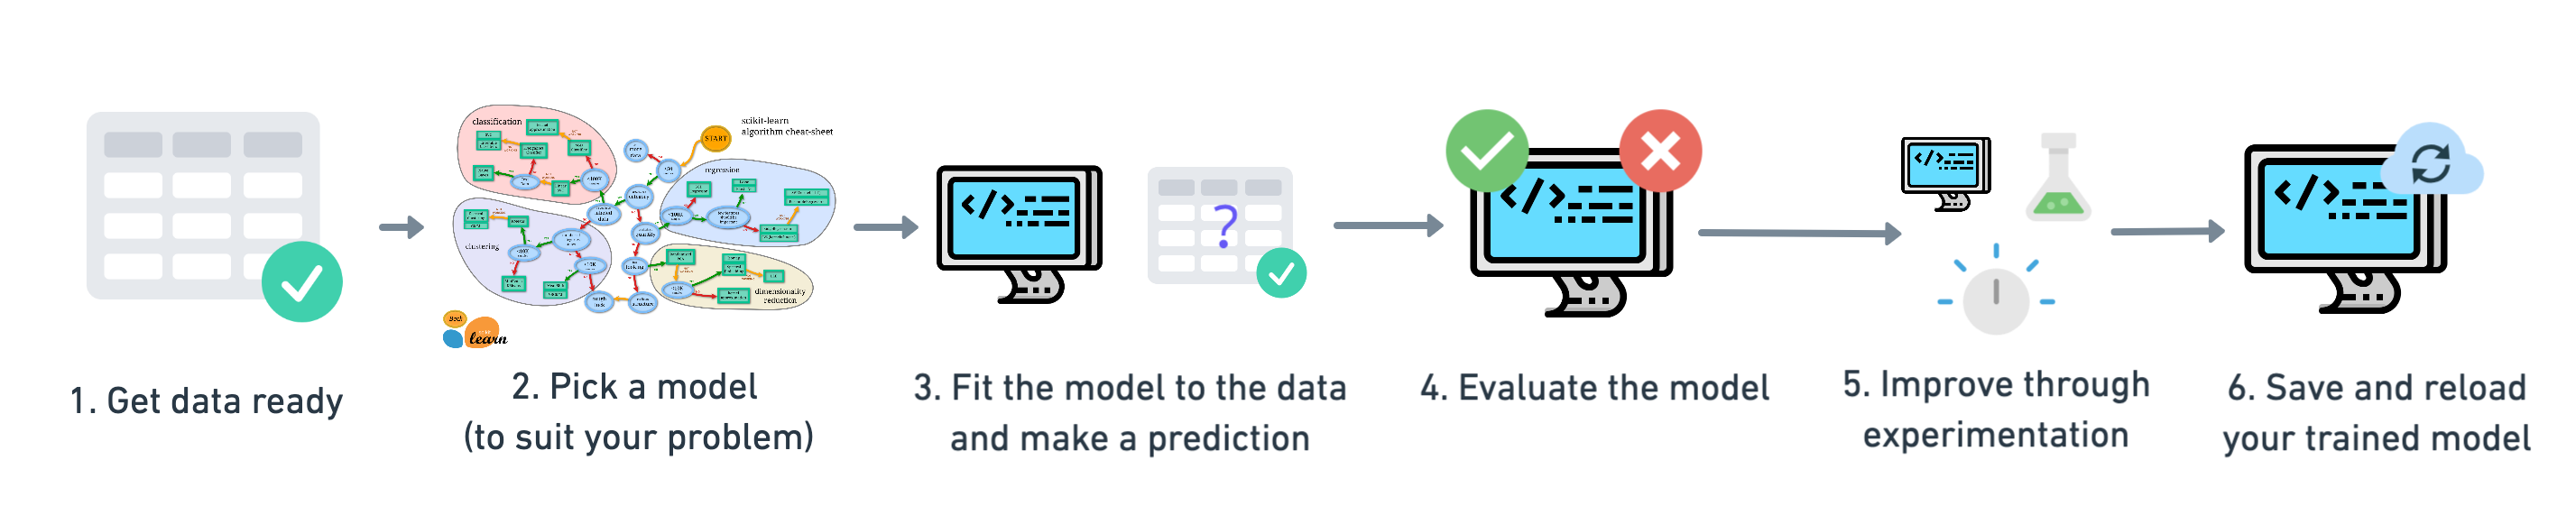

<br>
__________________________________________________________________________________________________________________________________

**Standard library imports**

For all machine learning projects, you'll often see these libraries (Matplotlib, NumPy and pandas) imported at the top.

In [23]:
%matplotlib inline
# so that the plots appear inline with notebook cells

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<br><br>


## 0. An end-to-end Scikit-Learn workflow
Before we get in-depth, let's quickly check out what an end-to-end Scikit-Learn workflow might look like.

### <u>Random Forest Classifier Workflow for Classifying Heart Disease</u>

**1. Get the data ready**

As an example dataset, we'll import `heart-disease.csv`.<br>This file contains anonymised patient medical records and whether or not they have heart disease or not.
<br><br>

In [24]:
import pandas as pd
heart_disease = pd.read_csv('./datasets/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Here, each row is a different patient and all columns except `target` are different patient characteristics.

`target` indicates whether the patient has heart disease.

`target = 1` => HAS heart disease<br>
`target = 0` => DOES NOT HAVE heart disease
<br><br>

In [25]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target or label column)
y = heart_disease["target"]

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test_size=0.2 implies that 20% dataset will be used for testing and 80% would be used for training.


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

<br><br>**2. Choose the model and hyperparameters**

This is often referred to as model or clf (short for classifier) or estimator (as in the Scikit-Learn) documentation.

Analogically, the ___Hyperparameters___ are like knobs on an oven that you can tune to cook your favourite dish.

We'll use a Random Forest algo...

In [30]:
# import RandomForest classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

<br><br>
Just keep the hyperparameters as default to begin with...

To take a look of hyperparameters use `.get_params()` method :

In [31]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<br><br>
**3. Fit the model to the data and use it to make a prediction**

Fitting the model on the data involves passing it the data and asking it to figure out the patterns.

If there are labels (supervised learning), the model tries to work out the relationship between the data and the labels.

If there are no labels (unsupervised learning), the model tries to find patterns and group similar samples together.

In [32]:
clf.fit(X_train, y_train)

RandomForestClassifier()

**Use the model to make a prediction**

The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

Once our model instance is trained, you can use the `predict()` method to predict a target value given a set of features.<br>In other words, use the model, along with some unlabelled data to predict the label.

> Note : Data you predict on has to be in the same shape as data you trained on.

In [33]:
# This doesn't work... incorrect shapes

y_label = clf.predict(np.array([0, 2, 3, 4]))

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<br><br>

So, eventually, error would arise because `clf.predict()` i.e. prediction can be made on such arrays only whose shape correspond to shape of `X_train`.

Let's try to run prediction on `X-test` :

In [34]:
# In order to predict a label, data has to be in the same shape as X_train

X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2


In [36]:
# Use the model to make a prediction on the test data (further evaluation)

y_preds = clf.predict(X_test)

y_preds

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

<br><br>
**4. Evaluate the model**

Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good our model is.

Each model or estimator has a built-in score method. This method compares how well the model was able to learn the patterns between the features and labels.

In other words, it returns how accurate your model is.

In [37]:
# Evaluate the model on the training set

clf.score(X_train, y_train)

# obviously score would be 1, since model has learnt on training data (X_train) only

1.0

In [38]:
# Evaluate the model on the test set

clf.score(X_test, y_test)

0.9016393442622951

<br><br>There are also a number of other evaluation methods we can use for our models.<br><br>

In [40]:
print("\t\t____ The Classification Report for Heart-Disease dataset____\n")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

		____ The Classification Report for Heart-Disease dataset____

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.88      0.93      0.90        30

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [41]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[27,  4],
       [ 2, 28]])

In [44]:
accuracy_score(y_test, y_preds)

0.9016393442622951

<br><br>
**5. Experiment to improve**

• The first model you build is often referred to as a baseline.

• Once you've got a **baseline model**, like we have here, it's important to remember, this is often not the final model you'll use.

• The next step in the workflow is to try and improve upon your baseline model.

And to do this, there's two ways to look at it. From a **model perspective** and from a **data perspective**.

• From a model perspective this may involve things such as using a more complex model or tuning your models hyperparameters.

• **From a data perspective**, this may involve collecting more data or better quality data so your existing model has more of a chance to learn the patterns within.

• If you're already working on an existing dataset, it's often easier try a series of model perspective experiments first and then turn to **data perspective experiments** if you aren't getting the results you're looking for.

One thing you should be aware of is if you're tuning a models hyperparameters in a series of experiments, your results should always be cross-validated. **Cross-validation** is a way of making sure the results you're getting are consistent across your training and test datasets (because it uses multiple versions of training and test sets) rather than just luck because of the order the original training and test sets were created.

- Try different hyperparameters
- All different parameters should be cross-validated

> **Note:** Beware of cross-validation for time series problems

Different models you use will have different hyperparameters you can tune. In our case, which is the `RandomForestClassifier()`, we'll start trying different values for `n_estimators`.

In [46]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.6f}%")
    
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 91.803279%

Trying model with 20 estimators...
Model accuracy on test set: 88.524590%

Trying model with 30 estimators...
Model accuracy on test set: 88.524590%

Trying model with 40 estimators...
Model accuracy on test set: 88.524590%

Trying model with 50 estimators...
Model accuracy on test set: 93.442623%

Trying model with 60 estimators...
Model accuracy on test set: 90.163934%

Trying model with 70 estimators...
Model accuracy on test set: 90.163934%

Trying model with 80 estimators...
Model accuracy on test set: 91.803279%

Trying model with 90 estimators...
Model accuracy on test set: 90.163934%



<br><br>• With cross-validation :<br><br>

In [47]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")
    
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 91.80327868852459%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 90.1639344262295%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 85.24590163934425%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 90.1639344262295%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 91.80327868852459%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 90.1639344262295%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 90.1639344262295%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 88.52459016393442%
Cross-validation score: 82.81420765027322

<br><br>• Another way to do it with **GridSearchCV** :<br><br>

In [48]:
# Another way to do it with GridSearchCV...
np.random.seed(42)

from sklearn.model_selection import GridSearchCV


# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}


# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)


# Fit the grid search to the data
grid.fit(X, y)


# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [49]:
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [50]:
# Set the model to be the best estimator

clf = grid.best_estimator_

clf

RandomForestClassifier(n_estimators=80)

In [51]:
# Fit the best model

clf = clf.fit(X_train, y_train)

In [52]:
# Find the best model scores

clf.score(X_test, y_test)

0.9016393442622951

<br><br>
**6. Save a model for someone else to use**

When you've done a few experiments and you're happy with how your model is doing, you'll likely want someone else to be able to use it.

This may come in the form of a teammate or colleague trying to replicate and validate your results or through a customer using your model as part of a service or application you offer.

Saving a model also allows you to reuse it later without having to go through retraining it. Which is helpful, especially when your training times start to increase.

You can save a scikit-learn model using Python's in-built `pickle module`.

In [53]:
import pickle

# Save an existing model to file
pickle.dump(model, open("./resources/random_forest_model_1--sklearn-1.pkl", "wb"))

In [54]:
# Load a saved model and make a prediction

loaded_model = pickle.load(open("./resources/random_forest_model-1--sklearn-1.pkl", "rb"))

loaded_model.score(X_test, y_test)

0.9016393442622951

<br><br>
We'll use 2 datasets for demonstration purposes :

- heart_disease -> a classification dataset (predicting whether someone has heart disease or not)
- boston_df -> a regression dataset (predicting the median house prices of cities in Boston)

In [2]:
# Classification data
heart_disease = pd.read_csv("./datasets/heart-disease.csv")

# Regression data
from sklearn.datasets import load_boston
boston = load_boston() # loads as dictionary

# Convert dictionary to dataframe
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<br>

### 1. Get the data ready

In [6]:
# Split data into X & y

X = heart_disease.drop("target", axis=1)                   # use all columns except target

y = heart_disease["target"]                                # we want to predict y using X

In [7]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Example use case (requires X & y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

<br><br>

### 2. Pick a model/estimator (to suit your problem)

To pick a model we use the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

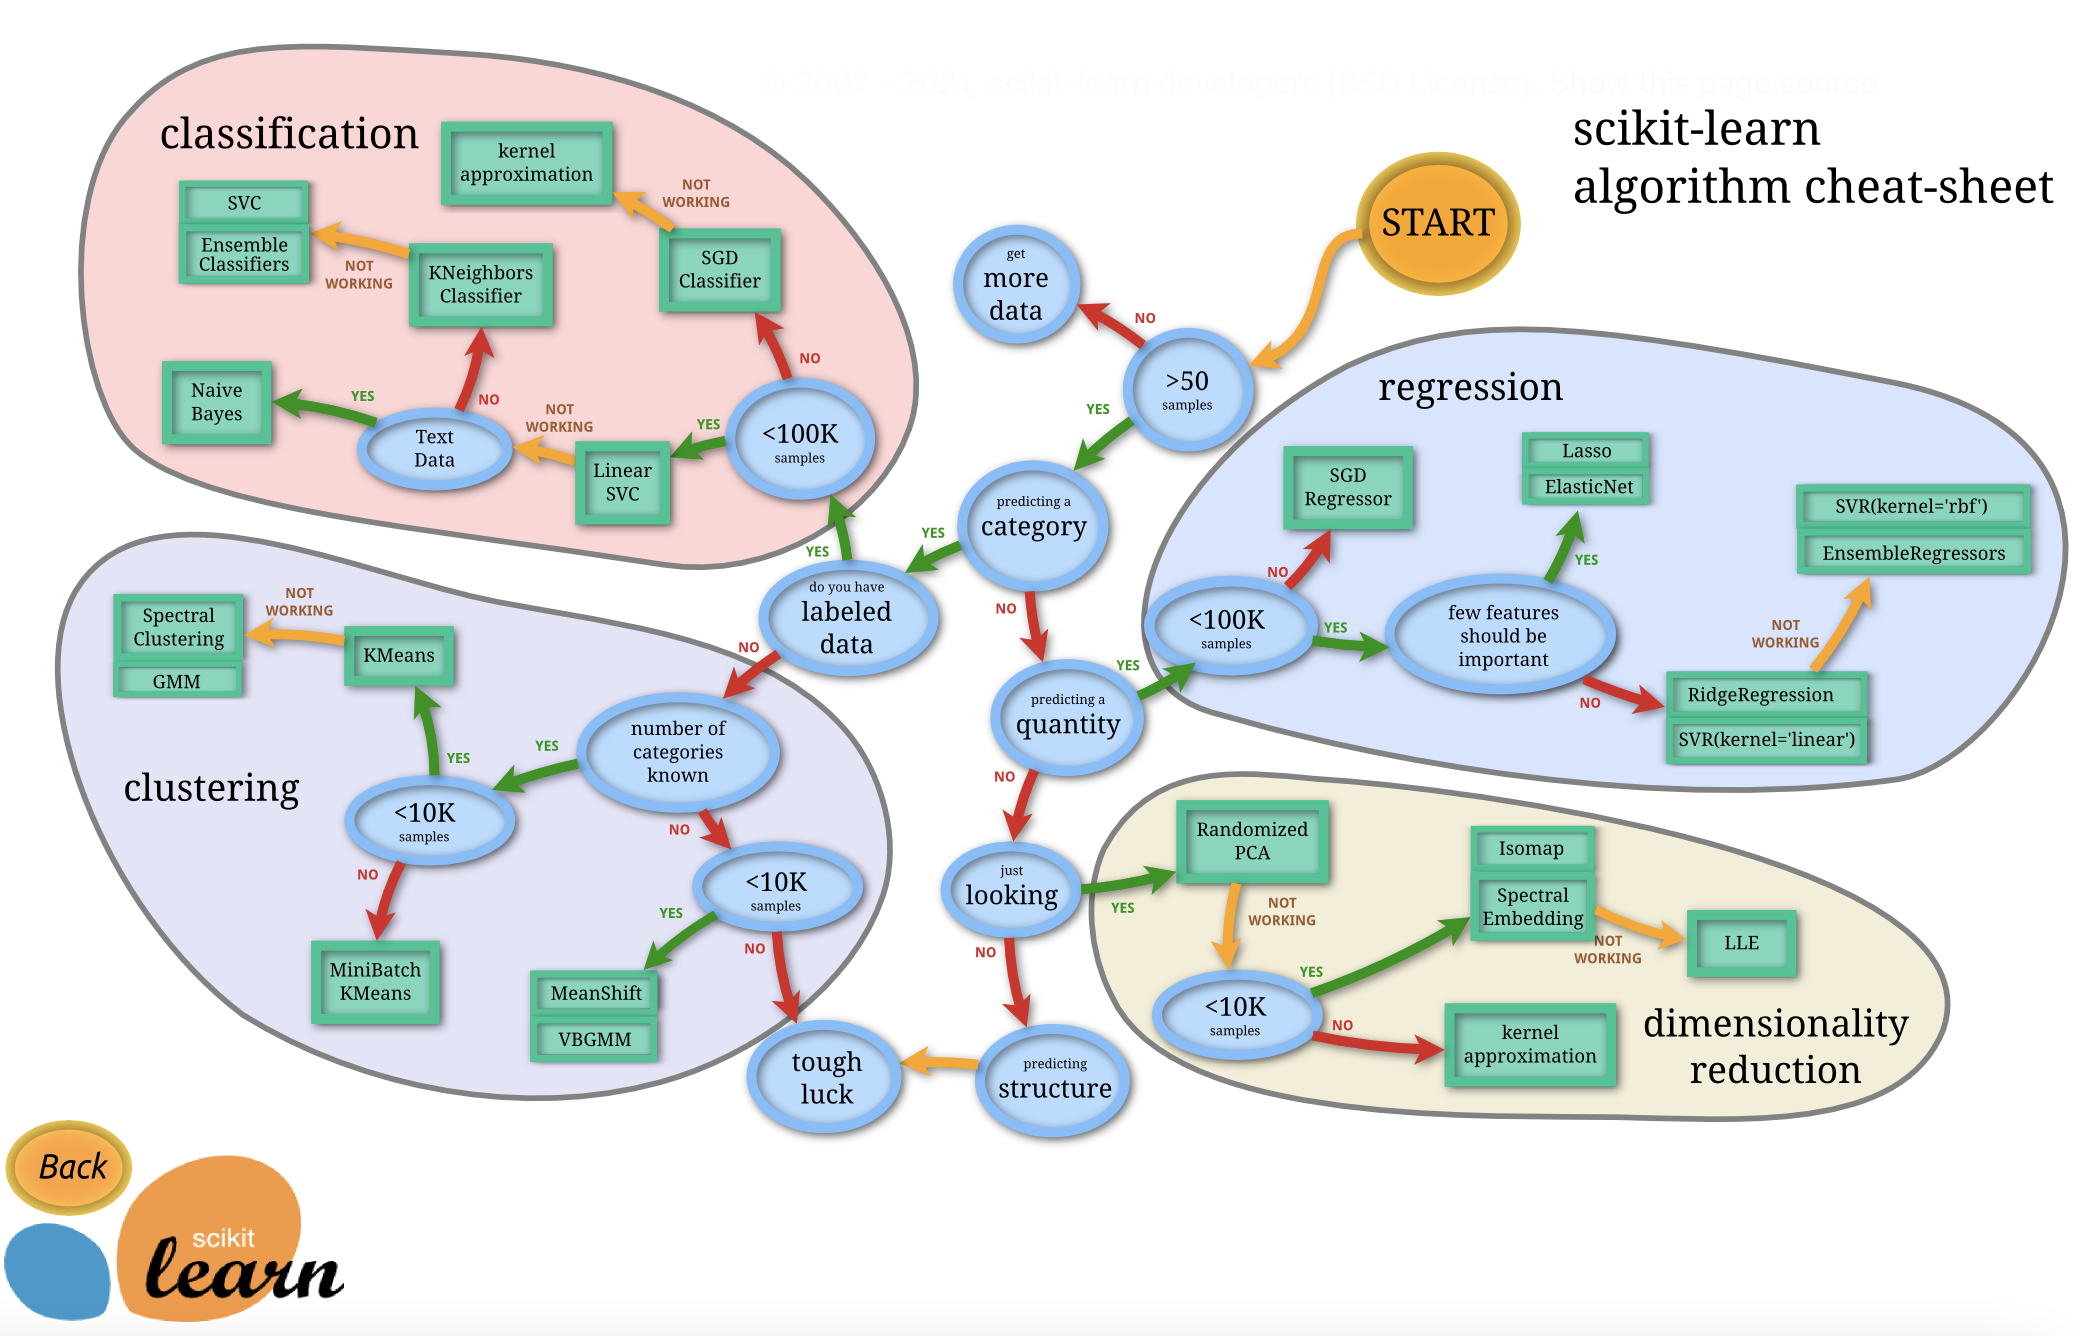

<br><br>

**Note :** Scikit-Learn refers to machine learning models and algorithms as estimators.
<br><br><br>

In [8]:
# Random Forest Classifier (for classification problems)

from sklearn.ensemble import RandomForestClassifier

# Instantiating a Random Forest Classifier (clf short for classifier)
clf = RandomForestClassifier()

In [9]:
# Random Forest Regressor (for regression problems)

from sklearn.ensemble import RandomForestRegressor

# Instantiating a Random Forest Regressor
model = RandomForestRegressor()

<br><br>
### 3. Fit the model to the data and make a prediction

In [10]:
# All models/estimators have the fit() function built-in
clf.fit(X_train, y_train)

# Once fit is called, you can make predictions using predict()
y_preds = clf.predict(X_test)

# You can also predict with probabilities (on classification models)
y_probs = clf.predict_proba(X_test)

# View preds/probabilities
y_preds, y_probs

(array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1]),
 array([[0.2 , 0.8 ],
        [0.85, 0.15],
        [0.78, 0.22],
        [0.42, 0.58],
        [0.29, 0.71],
        [0.21, 0.79],
        [0.73, 0.27],
        [0.3 , 0.7 ],
        [0.89, 0.11],
        [0.5 , 0.5 ],
        [0.28, 0.72],
        [0.04, 0.96],
        [0.71, 0.29],
        [0.02, 0.98],
        [0.3 , 0.7 ],
        [0.44, 0.56],
        [0.14, 0.86],
        [0.73, 0.27],
        [0.88, 0.12],
        [1.  , 0.  ],
        [0.71, 0.29],
        [0.33, 0.67],
        [0.47, 0.53],
        [0.18, 0.82],
        [0.83, 0.17],
        [0.23, 0.77],
        [0.7 , 0.3 ],
        [0.67, 0.33],
        [0.06, 0.94],
        [0.51, 0.49],
        [0.97, 0.03],
        [0.86, 0.14],
        [0.35, 0.65],
        [0.8

<br><br>
### 4. Evaluate the model
Every Scikit-Learn model has a default metric which is accessible through the `score()` function.

However there are a range of different evaluation metrics you can use depending on the model you're using.

A full list of evaluation metrics can be [found in the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [11]:
# All models/estimators have a score() function

clf.score(X_test, y_test)

0.8421052631578947

In [12]:
# Evaluting a model using cross-validation is possible with cross_val_score
from sklearn.model_selection import cross_val_score


# scoring=None means default score() metric is used
print(cross_val_score(estimator=clf, 
                      X=X, 
                      y=y, 
                      cv=5, # use 5-fold cross-validation
                      scoring=None)) 


# Evaluate a model with a different scoring method
print(cross_val_score(estimator=clf, 
                      X=X, 
                      y=y,
                      cv=5, # use 5-fold cross-validation
                      scoring="precision"))


[0.80327869 0.91803279 0.81967213 0.8        0.76666667]
[0.83783784 0.90625    0.84848485 0.87096774 0.76923077]


<br>

### Different classification metrics

In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))


# Reciver Operating Characteristic (ROC curve)/Area under curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:, 1])
print(roc_auc_score(y_test, y_preds))


# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))


# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

0.8421052631578947
0.8421052631578948
[[30  8]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.81      0.89      0.85        38

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



<br>

### Different Regression Metrics

In [14]:
# Make predictions first
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


# R^2 (pronounced r-squared) or coefficient of determination
from sklearn.metrics import r2_score
print(r2_score(y_test, y_preds))


# Mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_preds))


# Mean square error (MSE)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_preds))

0.782428730072165
2.633245098039216
20.659118990196067


### 5. Improve through experimentation
Two of the main methods to improve a models baseline metrics (the first evaluation metrics you get).

**From a data perspective asks :**

- Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
- Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

**From a model perspective asks :**

- Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
- Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

**Hyperparameters** are like settings on a model you can adjust so some of the ways it uses to find patterns are altered and potentially improved.<br>Adjusting hyperparameters is referred to as **hyperparameter tuning**.

In [15]:
# How to find a model's hyperparameters

clf = RandomForestClassifier()

clf.get_params() # returns a list of adjustable hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Example of adjusting hyperparameters by hand i.e. manually

In [16]:

# Split data into X & y
X = heart_disease.drop("target", axis=1) # use all columns except target
y = heart_disease["target"] # we want to predict y using X

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instantiate two models with different settings
clf_1 = RandomForestClassifier(n_estimators=100)
clf_2 = RandomForestClassifier(n_estimators=200)

# Fit both models on training data
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

# Evaluate both models on test data and see which is best
print(clf_1.score(X_test, y_test))
print(clf_2.score(X_test, y_test))

0.7763157894736842
0.8157894736842105


### Example of adjusting hyperparameters computationally (recommended)

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # try 10 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

# Find the best hyperparameters
print(rs_clf.best_params_)

# Scoring automatically uses the best hyperparameters
rs_clf.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

0.8360655737704918

<br>

### 6. Save and reload your trained model

You can save and load a model with pickle.

In [20]:
# Saving a model with pickle
import pickle

# Save an existing model to file
pickle.dump(rs_clf, open("./resources/rs_random_forest_model_1.pkl", "wb"))

In [21]:
# Load a saved pickle model
loaded_pickle_model = pickle.load(open("./resources/rs_random_forest_model_1.pkl", "rb"))

# Evaluate loaded model
loaded_pickle_model.score(X_test, y_test)

0.8360655737704918

<br><br>You can do the same with joblib. joblib is usually more efficient with numerical data (what our models are).<br><br>

### Saving a model with joblib

In [23]:
from joblib import dump, load

# Save a model to file
dump(rs_clf, filename="./resources/gs_random_forest_model_1.joblib")

['./resources/gs_random_forest_model_1.joblib']

In [25]:
# Import a saved joblib model

loaded_joblib_model = load(filename="resources/gs_random_forest_model_1.joblib")

In [26]:
# Evaluate joblib predictions

loaded_joblib_model.score(X_test, y_test)

0.8360655737704918

### 7. Putting it all together (not pictured)
We can put a number of different Scikit-Learn functions together using Pipeline.

As an example, we'll use `car-sales-extended-missing-data.csv`, which has missing data as well as non-numeric data.<br>**For a machine learning model to work, there can be no missing data or non-numeric values.**

The problem we're solving here is predicting a cars sales price given a number of parameters about the car<br>**(a regression problem)**.

In [30]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


# Setup random seed
import numpy as np
np.random.seed(42)


# Import data and drop the rows with missing labels
data = pd.read_csv("./datasets/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)


# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])


# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])


# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])


# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875